### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [1]:
### Importing Required Library


import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
### Data Ingestion

df = pd.read_csv('data/gemstone.csv')
df                 


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [3]:
### Checking for null values
df[df.isnull()].sum()

id         0.0
carat      0.0
cut          0
color        0
clarity      0
depth      0.0
table      0.0
x          0.0
y          0.0
z          0.0
price      0.0
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [5]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
df1 = df.drop('id', axis=1)
df1

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [7]:
df[df.duplicated()].sum()

id           0
carat      0.0
cut          0
color        0
clarity      0
depth      0.0
table      0.0
x          0.0
y          0.0
z          0.0
price        0
dtype: object

## Observation --- 

1)No missing values found 

2)Dataset 3 categorical feature & 8 numerical features

3)ID column dropped (Not relevant feature)

4)Dataset have no duplicated records

In [8]:
### Dividing numerical and categorical features

num_cols = df1.columns[df1.dtypes!='object']
cat_cols = df1.columns[df1.dtypes=='object']

In [9]:
df[cat_cols].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [10]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [11]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [12]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

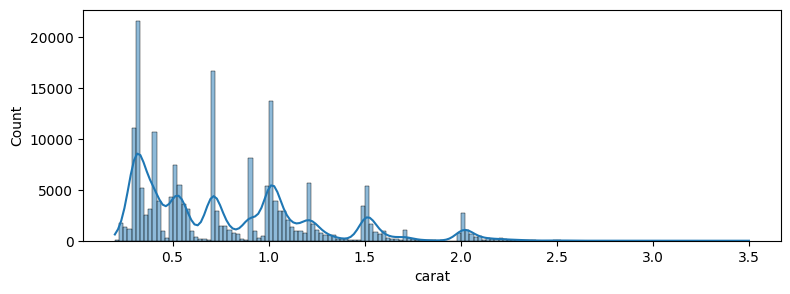

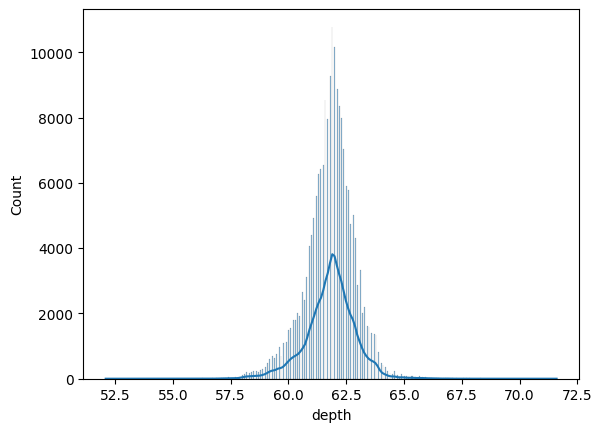

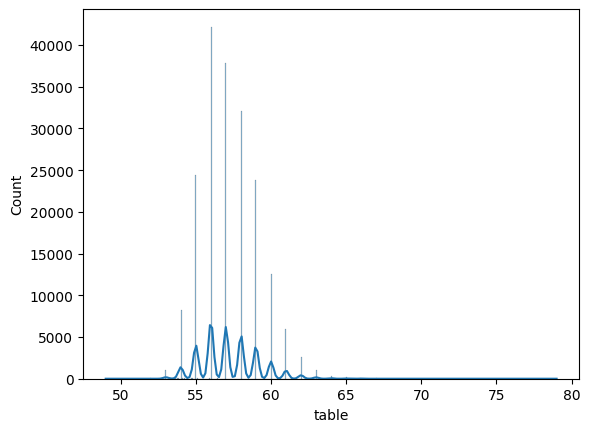

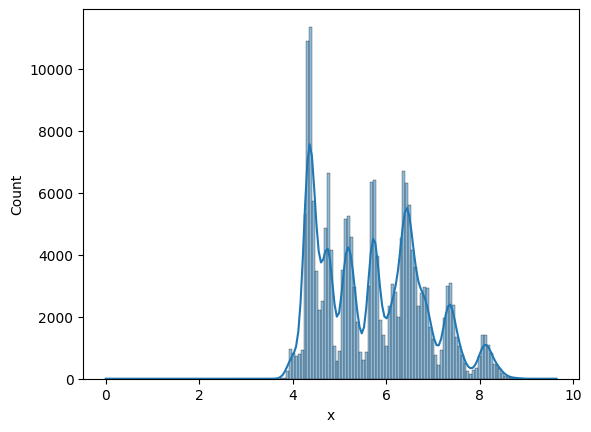

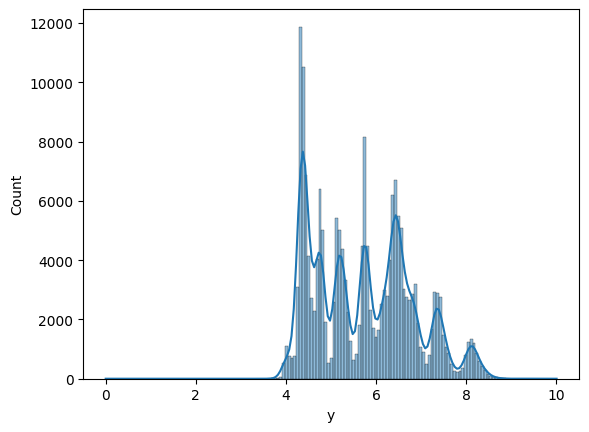

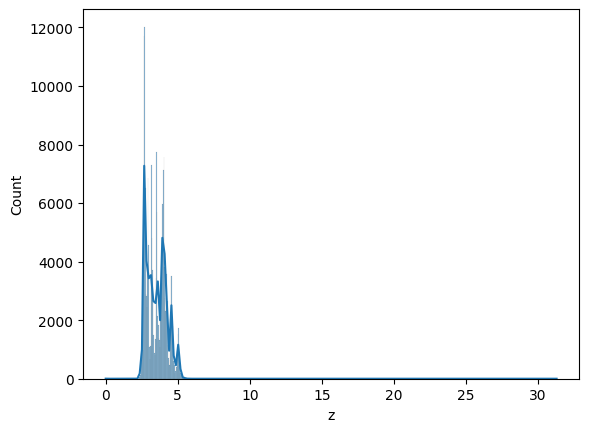

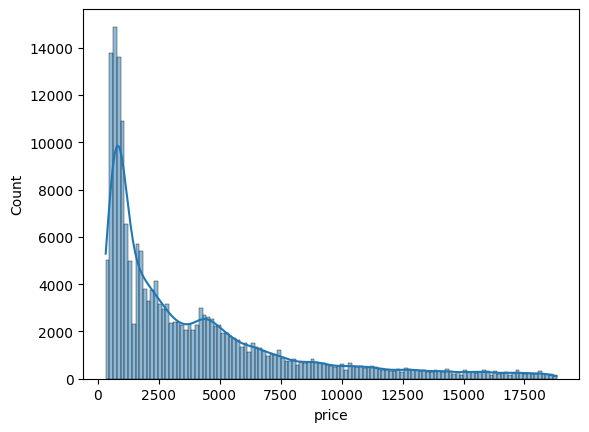

In [13]:
plt.figure(figsize=(9,3))
x=0
for i in num_cols:
    sns.histplot(data=df1 , x=i , kde=True)
    print('\n')
    plt.show()

<Figure size 900x300 with 0 Axes>

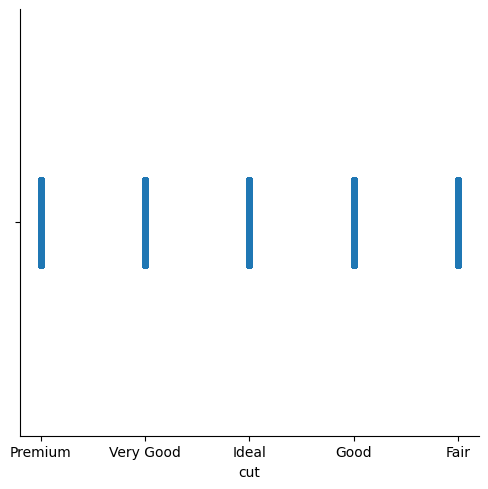

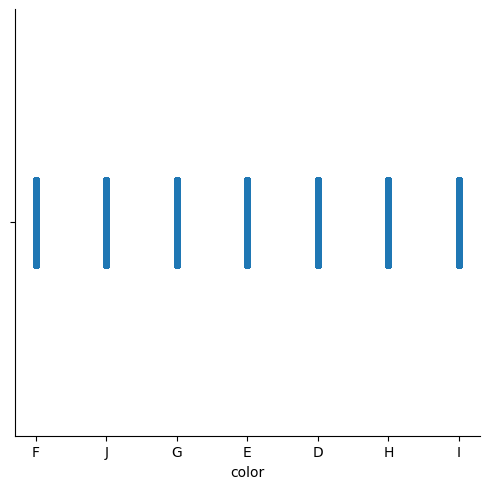

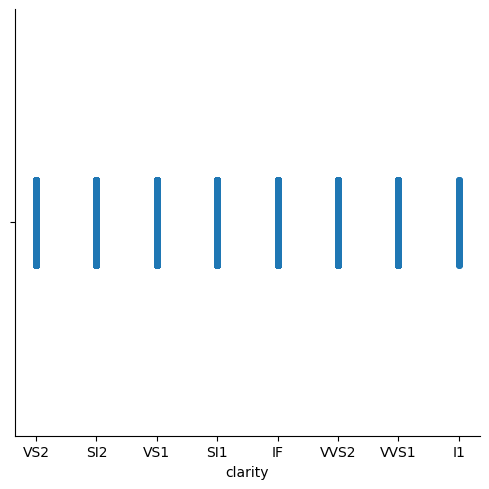

In [14]:
plt.figure(figsize=(9,3))
x=0
for i in cat_cols:
    sns.catplot(data=df , x=i )
    print('\n')
    plt.show()

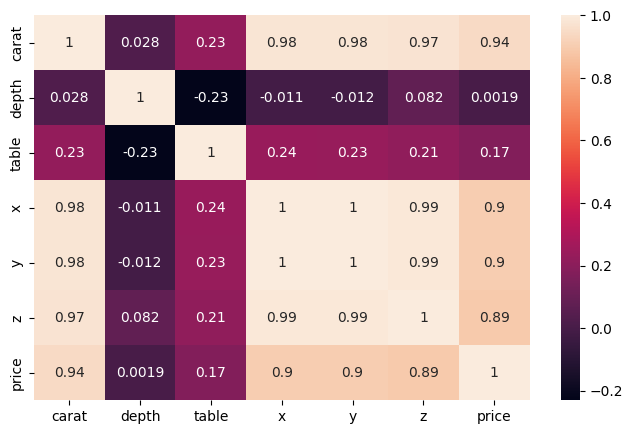

In [15]:
plt.figure(figsize=(8,5))
sns.heatmap(df[num_cols].corr() , annot=True)
plt.show()

In [16]:
df_num = df1[num_cols].drop(labels=['x','y','z'] , axis=1)

In [17]:
df_num

,carat,depth,table,price
0,1.52,62.2,58.0,13619
1,2.03,62.0,58.0,13387
2,0.70,61.2,57.0,2772
3,0.32,61.6,56.0,666
4,1.70,62.6,59.0,14453
...,...,...,...,...
193568,0.31,61.1,56.0,1130
193569,0.70,60.3,58.0,2874
193570,0.73,63.1,57.0,3036
193571,0.34,62.9,55.0,681


In [18]:
df_cat= df1[cat_cols]
df_cat

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


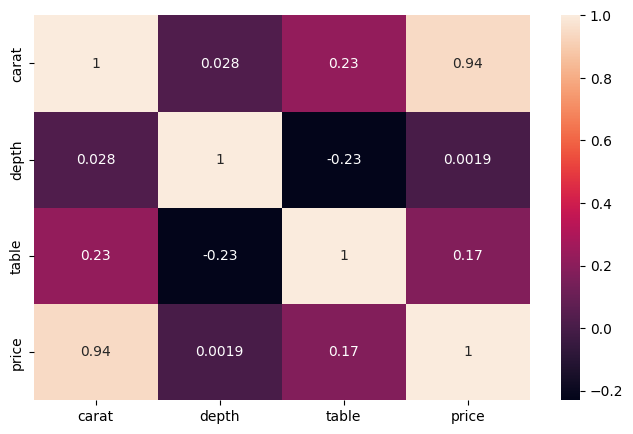

In [19]:
plt.figure(figsize=(8,5))
sns.heatmap(df_num.corr() , annot=True)
plt.show()

In [20]:
## For Domain Purpose https://www.americangemsociety.org/ags-diamond-grading-system/

cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [21]:
df1['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [22]:
cut_map={"Fair":5,"Good":4,"Very Good":3,"Premium":2,"Ideal":1}

In [23]:
df1['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [24]:
color_map= {'J':7,"I":6,"H":5,"G":4,"F":3,"E":2,"D":1}

In [25]:
df1['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [26]:
clarity_map = {"I1":8,"SI2":7 ,"SI1":6 ,"VS2":5 , "VS1":4 , "VVS2":3 , "VVS1":2 ,"IF":1}

In [27]:
df1['cut'] = df1['cut'].map(cut_map)
df1['clarity'] = df1['clarity'].map(clarity_map)
df1['color']= df1['color'].map(color_map)

In [28]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,2,3,5,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,7,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,1,4,4,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,1,4,4,61.6,56.0,4.38,4.41,2.71,666
4,1.70,2,4,5,62.6,59.0,7.65,7.61,4.77,14453


In [29]:
df_final = df1.drop(labels=['x','y','z'] , axis=1)

In [30]:
df_final.head()

,carat,cut,color,clarity,depth,table,price
0,1.52,2,3,5,62.2,58.0,13619
1,2.03,3,7,7,62.0,58.0,13387
2,0.70,1,4,4,61.2,57.0,2772
3,0.32,1,4,4,61.6,56.0,666
4,1.70,2,4,5,62.6,59.0,14453
